# 1. Motivation: 


- ###  <font color=green >What is your dataset?</font>
    *  The primary dataset used in the analysis is the "Fire Incidents" dataset, which is available on the San Francisco Open Data Portal. It contains detailed information about fire incidents that have occurred in San Francisco from 2003 to the present. The dataset includes information such as the location, date and time of the incident, type of property affected, and details about the incident, such as the cause and the level of damage. But we have chosen to look at data from the year 2010 until 2022 to make it more manageable to visualize.
    
    * Another data set that we have used is the "Francisco Planning Neighborhood Groups", which provides information about the different neighborhoods in San Francisco. In addition, we have used the dataset "City-owned Facilities - Fire and Police", which contains the location of fire station in San Francisco.

- ### <font color=green >Why did you choose this/these particular dataset(s)?</font>

    * Fires are a common occurrence worldwide, and they can cause significant damage to property and lives. As such, it is essential to study and analyze fire incidents to understand their causes and how to prevent them from happening in the future. 

- ### <font color=green >What was your goal for the end user's experience?</font>

    * The goal for the end user's experience with this analysis is to gain insights into the patterns and trends of fire incidents in San Francisco, such as the frequency and average arrival time for each neighborhood, the locations and times of fire incidents, and the effectiveness of fire response and prevention measures. 


__________________________

# 2. Basic stats. Let's understand the dataset better

- ### <font color=green >Write about your choices in data cleaning and preprocessing</font>

    * To conduct meaningful analysis and obtain valuable insights from the data we did data cleaning and preprocessing, which are essential steps before conducting any analysis on thedataset.

    * The code first checks whether the dataset is available locally or not. If not, it downloads the dataset from a remote API and saves it locally for further analysis. Then, it performs several preprocessing steps, such as converting date columns to datetime format, extracting the month and year from the incident date, and filtering the dataset to include only the rows that belong to San Francisco city and between the date range of 2010 to 2022.

    * Moreover, the code also drops unnecessary columns that are not needed for the analysis. Additionally, it creates a new column called 'focuse_Situation_by_number' by extracting the first three characters from the 'Primary Situation' column. Finally, it drops two error rows from the dataset. 
    
    * To dive in to analyze our dataset, we made use of variety of Python libraries for data analysis and visualization, Bokeh, NumPy, ipyleaflet, Plotly, seaborn, folium, and others. These libraries provide functions and tools for creating maps, graphs, and other visualizations of data, as well as for manipulating and analyzing data sets. 

In [1]:
import os
from bokeh.models import ColumnDataSource,Legend
from bokeh.io import output_notebook, show
from bokeh.palettes import Category10
from bokeh.plotting import figure, show
from bokeh.io import output_file
import numpy as np
from ipyleaflet import Map, GeoJSON, Marker, AwesomeIcon, FullScreenControl
import requests
import json
import random
import plotly.graph_objs as go
import plotly.offline as pyo
from datetime import datetime
import seaborn as sns
from folium.plugins import HeatMap
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
import calplot
import mpld3
import folium


In [2]:
##
#
# Author: 
# Salim Omar
#
##

# cleaning and preprocessing

csv_path = "../../../../Data-Ana/Fire_Incidents.csv"

if not os.path.exists(csv_path):
    # Download CSV from API if it doesn't exist locally
    url = "https://data.sfgov.org/resource/wr8u-xric.json"
    response = requests.get(url)
    df = pd.read_json(response.text)
    df.to_csv(csv_path, index=False)
    print("The data has been readed from ", url)
else:
    # Load CSV from local file
    df = pd.read_csv(csv_path)
    print("The data is found locally")

#df.head()


# cleaning and preprocessing


df['Incident Date'] = pd.to_datetime(df['Incident Date'])
df['Alarm DtTm'] = pd.to_datetime(df['Alarm DtTm'])
df['Arrival DtTm'] = pd.to_datetime(df['Arrival DtTm'])
df['Close DtTm'] = pd.to_datetime(df['Close DtTm'])

df['Incident Time'] = df['Incident Date'].dt.time
df['Incident month'] = df['Incident Date'].dt.month
df['Incident year'] = df['Incident Date'].dt.year


# Get the data from date 2010-04-01 to 2023-04-01
df = df[(df['Incident year'] >= 2010) &
        (df['Incident year'] <= 2022)]


# print the number of rows
num_rows = df.shape[0]
print("The number of rows is:", num_rows)

# get just the data from Sf city
df = df[(df['City'] == 'SF') | (df['City'] == 'San Francisco')
        | (df['City'] == 'SAN FRANCISCO')]

# Deleting all unnaseccary columns
df.drop(columns=['Exposure Number',
                'Box',
                'Fire Fatalities',
                'Fire Injuries',
                'Civilian Fatalities',
                'Civilian Injuries',
                'Number of Alarms',
                'Mutual Aid',
                'Action Taken Secondary',
                'Action Taken Other',
                'Area of Fire Origin',
                'Ignition Cause',
                'Ignition Factor Primary',
                'Ignition Factor Secondary',
                'Item First Ignited',
                'Human Factors Associated with Ignition',
                'Structure Type',
                'Structure Status',
                'Floor of Fire Origin',
                'Fire Spread',
                'No Flame Spead',
                'Number of floors with minimum damage',
                'Number of floors with significant damage',
                'Number of floors with heavy damage',
                'Number of floors with extreme damage',
                'Detectors Present',
                'Detector Type',
                'Detector Operation',
                'Detector Effectiveness',
                'Detector Failure Reason',
                'Automatic Extinguishing System Present',
                'Automatic Extinguishing Sytem Type',
                'Automatic Extinguishing Sytem Perfomance',
                'Automatic Extinguishing Sytem Failure Reason',
                'Number of Sprinkler Heads Operating'
                ], inplace=True)
# the code for Primary Situation
df['focuse_Situation_by_number'] = df['Primary Situation'].str[:3]

# error rows
df = df[df['Battalion'] != 'B99']
df.drop(df[df['ID'] == 140383810 ].index, axis=0, inplace=True)
df.drop(df[df['ID'] == 140660390 ].index, axis=0, inplace=True)

print("Example on dataset:")
df.head()



The data is found locally
The number of rows is: 408335
Example on dataset:


,Incident Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,zipcode,...,Detector Alerted Occupants,Property Use,Heat Source,Supervisor District,neighborhood_district,point,Incident Time,Incident month,Incident year,focuse_Situation_by_number
205932,10001468,100014680,274 Brannan St.,2010-01-05,100050086,2010-01-05 08:26:41,2010-01-05 08:32:04,2010-01-05 08:41:49,SF,94107,...,-,429 - Multifamily dwellings,NaN,NaN,Financial District/South Beach,POINT (-122.39169312 37.78233494),00:00:00,1,2010,745
205933,10001472,100014720,Brotherhood Wy. / Thomas More Wy.,2010-01-05,100050091,2010-01-05 08:52:51,2010-01-05 08:57:14,2010-01-05 08:57:36,SF,94112,...,-,"960 - Street, other",NaN,7.0,Lakeshore,POINT (-122.472734 37.712926),00:00:00,1,2010,711
205934,10001473,100014730,684 48th Av.,2010-01-05,100050092,2010-01-05 08:54:09,2010-01-05 09:23:33,2010-01-05 09:23:48,SF,94121,...,-,429 - Multifamily dwellings,NaN,NaN,Outer Richmond,POINT (-122.509025 37.775448),00:00:00,1,2010,353
205935,10001476,100014760,690 Market St.,2010-01-05,100050098,2010-01-05 09:07:38,2010-01-05 09:11:47,2010-01-05 09:20:48,SF,94105,...,-,599 - Business office,NaN,NaN,Financial District/South Beach,POINT (-122.403309 37.787838),00:00:00,1,2010,740
205936,10001477,100014770,1300 Junipero Serra Bl.,2010-01-05,100050099,2010-01-05 09:10:42,2010-01-05 09:15:48,2010-01-05 09:21:06,SF,94112,...,-,429 - Multifamily dwellings,NaN,7.0,Lakeshore,POINT (-122.472036 37.711842),00:00:00,1,2010,700


- ### <font color=green >Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.</font>
   * The Fire Incidents dataset from San Francisco contains information on fire incidents reported in San Francisco. The dataset has 408,335 rows and 63  columns, with each row representing a single alarm type.
   Exploratory data analysis using the ProfileReport function from the ydata_profiling library reveals several key insights about the dataset.
Firstly, we see that the dataset has missing values in columns such as Box, number_of_sprinkler_heads_operating, and automatic_extinguishing_sytem_failure_reason. Additionally, the Addres column has a large number of unique values, suggesting that there have been a significant number of fire incidents on different locations in San Francisco over the years.

In [ ]:
from ydata_profiling import ProfileReport

# Generate report
report = ProfileReport(df)

# Export report as HTML file
report.to_file('my_report.html')

* This code generates a calendar plot showing the number of fire incidents that occurred on each day within a given date range.

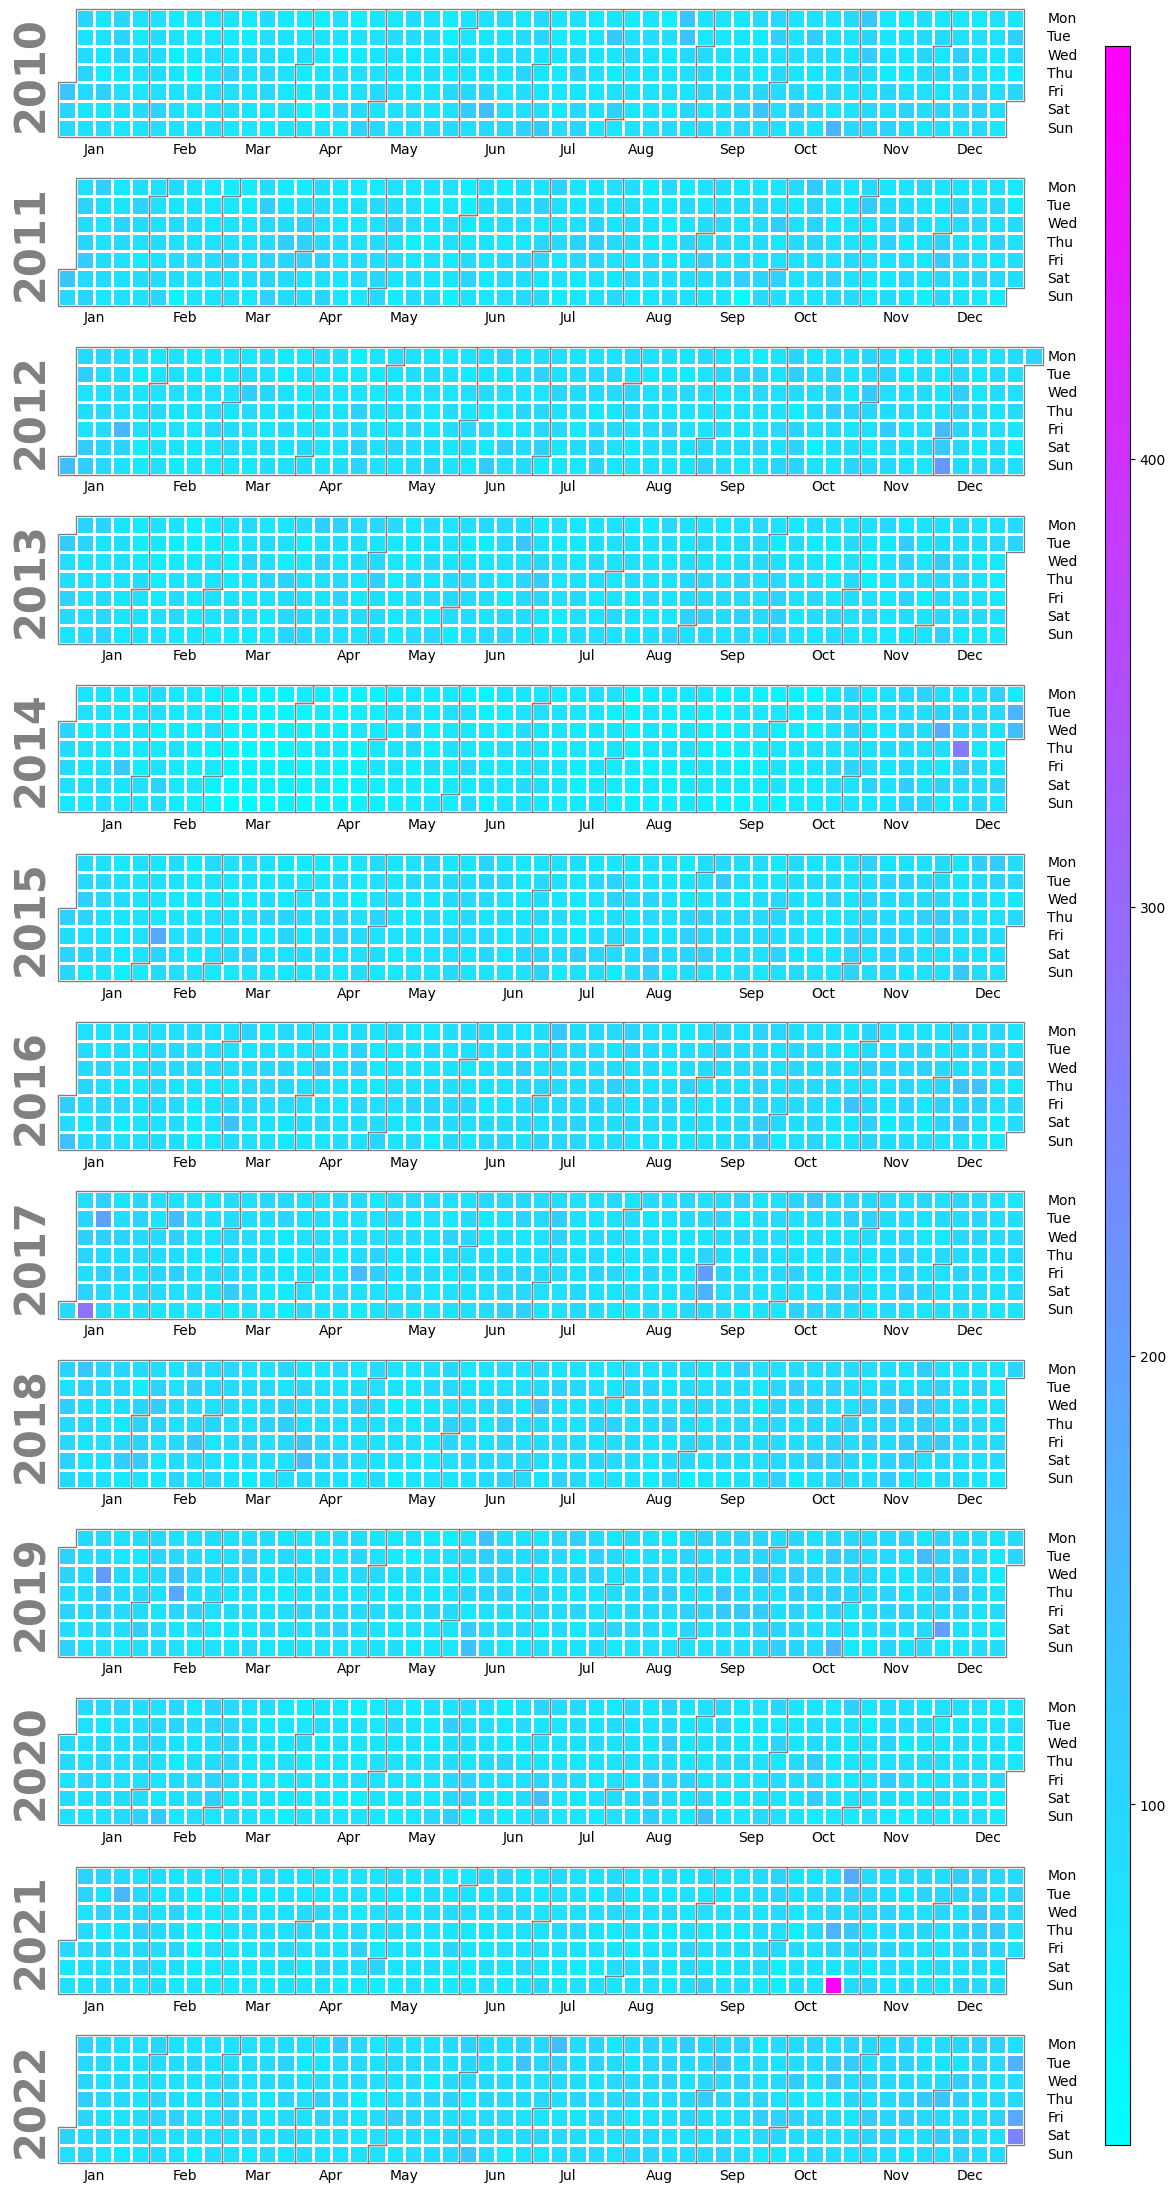

In [73]:
# Author Thomas Arildtoft - S193564

# Filter the fire incidents to keep only dates where incidents happened
events_by_date = df.groupby('Incident Date').size()

non_zero_dates = events_by_date[events_by_date > 0].index

df_filtered = df[(df['Incident Date'].isin(non_zero_dates))]

# Group the filtered DataFrame by date and count the number of incidents on each date
counts = df_filtered.groupby('Incident Date').size()

theRange = pd.date_range(start="2010-01-01", end="2022-12-31", freq='D')
events = pd.Series(counts, index=theRange)

# Set the colormap to 'cool'
custom_cmap = plt.get_cmap('cool')
fig, ax = calplot.calplot(events, cmap=custom_cmap)

# Add a hover effect to show the value of each date
cursor = mplcursors.cursor(ax, hover=True)
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    value = events.loc[index]
    sel.annotation.set_text(f"{index.strftime('%Y-%m-%d')}: {value}")

# Convert the plot to an interactive HTML format
html_fig = mpld3.fig_to_html(fig)

# Save the HTML file
#with open('calplot.html', 'w') as f:
#    f.write(html_fig)



* This visualization shows the total number of alarms for all battalions per year in a stacked bar chart. The data is filtered to include only incidents from specific battalions that occurred between 2010 and 2023.
*  The data is then grouped by battalion and year, and the number of incidents for each battalion in each year is counted. The resulting table is pivoted so that each battalion is a row and each year is a column. The stacked bar chart shows the total number of alarms for each year, with each battalion's contribution represented by a different color. The legend is placed outside the plot area for clarity. Hover effects are added to the chart, so that when the mouse is over a specific area, the battalion, year, and count of alarms for that area are displayed. Finally, the plot is converted to HTML and saved to a file.

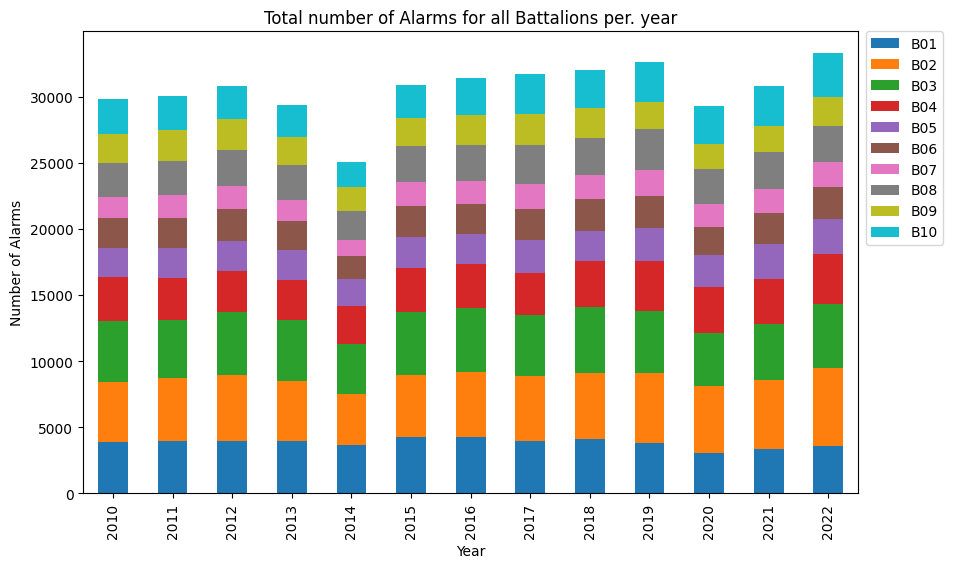

In [55]:
# Author Thomas Arildtoft - S193564

# Filter the data by Battalion and Incident Date
df_filtered = df[(df['Battalion'].isin(['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10']))]

# Create a new column with the year of the incident
df_filtered['Year'] = pd.DatetimeIndex(df_filtered['Incident Date']).year

# Group the data by Battalion and Year and count the number of incidents
df_grouped = df_filtered.groupby(['Battalion', 'Year'])['Incident Number'].count().reset_index()

# Pivot the data to create a table with Battalion as rows and Year as columns
df_pivoted = df_grouped.pivot(index='Year', columns='Battalion', values='Incident Number')

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

df_pivoted.plot(kind='bar', stacked=True, ax=ax)

# Set the title and axis labels
ax.set_title('Total number of Alarms for all Battalions per. year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Alarms')

# Move the legend outside the plot area
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

# Add hover effects to the plot
cursor = mplcursors.cursor(ax, hover=True)
@cursor.connect('add')
def on_add(sel):
    battalion = sel.artist.get_label()
    year = sel.target[0]
    count = df_pivoted.loc[year, battalion]
    sel.annotation.set_text(f'Battalion: {battalion}\nYear: {year}\nCount: {count}')
    sel.annotation.set_position((-20, 20))
    sel.annotation.set_fontsize(12)
    sel.annotation.set_fontstyle('italic')
    sel.annotation.set_backgroundcolor('white')
    sel.annotation.set_bbox({'boxstyle': 'round', 'edgecolor': 'gray', 'alpha': 0.7})

# Convert the plot to HTML
html_fig = mpld3.fig_to_html(fig)

# Output the HTML
#with open('Total_Number_Of_alarms_Battalion.html', 'w') as f:
#    f.write(html_fig)


* This code computes the time it takes for each fire department unit to arrive at the scene of an incident, and creates a new column in the dataset to store these values. It generates a line chart using the Plotly, seaborn and mplcursors libraryies to visualize the the dataset by battalion and year, and calculates the average arrival time for each group and sets some hovering effects on the plot.

In [57]:

# Author-
# Ali Dadayev 


# Convert to minutes and add a new column
df['Arrive time_minutes'] = ((df['Arrival DtTm'] - df['Alarm DtTm']).dt.total_seconds() / 60.0).round(2)

# Group by battalion and year
df_grouped = df.groupby(['Battalion', 'Incident year'])['Arrive time_minutes'].mean().reset_index()

# Create a line plot for each battalion using Plotly
fig = go.Figure()
for battalion in df_grouped['Battalion'].unique():
    data = df_grouped[df_grouped['Battalion'] == battalion]
    fig.add_trace(go.Scatter(x=data['Incident year'], y=data['Arrive time_minutes'], name=battalion, line=dict(width=2)))

# Set layout for the plot
fig.update_layout(
    title="Average Arrival Time by Battalion and Year",
    xaxis_title="Year",
    yaxis_title="Average Arrival Time (Minutes)",
    font=dict(
        family="Arial",
        size=16,
        color="#7f7f7f"
    ),
    legend=dict(
        title="Battalion",
        font=dict(
            family="Arial",
            size=12,
            color="#7f7f7f"
        ),
        yanchor="top",
        y=1,
        xanchor="right",
        x=1
    ),
    plot_bgcolor="#f2f2f2",
    xaxis=dict(
        tickmode='linear',
        tick0=2003,
        dtick=1
    )
)

# Add interactivity to the plot using mplcursors
annotations = [f"{battalion}\nYear: {int(data['Incident year'])}\nAvg. Arrival Time: {data['Arrive time_minutes']:.2f} minutes"
            for battalion, data in df_grouped[['Battalion', 'Incident year', 'Arrive time_minutes']].iterrows()]
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(annotations[sel.target.index]))

# Save the plot to an HTML file and display it in the browser
#pyo.plot(fig, filename='battalion_arrival_time.html', auto_open=True)

# Display the plot in the notebook
pyo.iplot(fig)

In [81]:
##
#
# Author: 
# Salim Omar
#
##
df.dropna(subset=['neighborhood_district'], inplace=True)
df['neighborhood_district'] = df['neighborhood_district'].dropna()
# print(call_Situation)
neighborhood_district = df['neighborhood_district']
len(neighborhood_district)
# by using unique() fun we can se the diffrenet type of data

ListOfneighborhood = neighborhood_district.unique()
print(ListOfneighborhood)

neighborhood_count = neighborhood_district.value_counts()
print("neighborhood lenght :",len(neighborhood_count))
top10 = neighborhood_count.nlargest(10)
print("The top 1o list\n",top10)

['Financial District/South Beach' 'Lakeshore' 'Outer Richmond' 'Excelsior'
 'Bayview Hunters Point' 'Mission' 'Western Addition' 'Mission Bay'
 'Tenderloin' 'Portola' 'Inner Sunset' 'Bernal Heights' 'South of Market'
 'Pacific Heights' 'Hayes Valley' 'Potrero Hill' 'Sunset/Parkside'
 'Chinatown' 'Oceanview/Merced/Ingleside' 'Castro/Upper Market'
 'Lone Mountain/USF' 'Presidio Heights' 'Visitacion Valley'
 'West of Twin Peaks' 'North Beach' 'Russian Hill' 'Haight Ashbury'
 'Nob Hill' 'Marina' 'Inner Richmond' 'Lincoln Park' 'Seacliff'
 'Golden Gate Park' 'Noe Valley' 'Glen Park' 'Treasure Island'
 'Twin Peaks' 'Outer Mission' 'McLaren Park' 'Japantown' 'Presidio']
neighborhood lenght : 41
The top 1o list
 neighborhood_district
Tenderloin                        38295
Mission                           34559
Financial District/South Beach    32085
South of Market                   31069
Bayview Hunters Point             21494
Western Addition                  15977
Sunset/Parkside         

* In the code down bellow we further cleaning and preprocessing the data set.  The code replaces some values in the 'Primary Situation' column to group similar situations together, drops some null values, and splits multiple situations separated by a comma to only keep the first situation. The resulting 'call_Situation' column contains the cleaned and processed values. 

In [3]:
##
#
# Author: 
# Salim Omar
#
df['Primary Situation'] = df['Primary Situation'].str.replace('- ', '')
df.dropna(subset=['Primary Situation'], inplace=True)
df['Primary Situation'] = df['Primary Situation'].dropna().apply(
    lambda x: x.split(',')[0])

Primary_Situation= df['Primary Situation']
ListOfPrimary_Situation = Primary_Situation.unique()
print("the len of unique Primary_Situationis:", len(ListOfPrimary_Situation))

the len of unique Primary_Situationis: 240


* The code down bellow helps us to focus on the most relevant variables. This code create a new dataframe (top10_df) that focuses on the key variables that we want to analyze:
Primary Situation, focuse_Situation_by_number, neighborhood_district, and Incident year. This code also allows us to clean and preprocess the Primary Situation variable by replacing two similar categories with one common category, and removing a category that is not relevant for our analysis.

* We choosed to take the top 10 call Situation becouse our dataset contain more then 240 Primary Situation which some of them are same and some of them is just used at the post and they choose to call it somthing else later.
* then, the code calculates the count of each unique value in the 'call_Situation' column and identifies the top 10 most frequent situations using the 'value_counts()' and 'nlargest()' functions. 
And now we can create our plot over top 10 Primary Situations in order to see the top 10 types of calls that were registered the most.

* This information is useful for identifying the most common situations that the San Francisco Fire Department responds to, which can help prioritize resources and improve response strategies. 

In [18]:
##
#
# Author: 
# Salim Omar
#
##
# create a new dataset for top 10 Primary Situation
top10_df = df[['Primary Situation', 'focuse_Situation_by_number','neighborhood_district','Incident year']].copy()

# replace 2 coulms in 1 
top10_df['Primary Situation'].replace(['745 Alarm system sounded/no fire-accidental',
                                '735 Alarm system sounded due to malfunction'], '745 Alarm system activation', inplace=True)
top10_df = top10_df[top10_df['Primary Situation'] != '554 Assist invalid']

# add Situation_by_code
top10_df['focuse_Situation_by_number'] = top10_df['Primary Situation'].str[:3]

call_Situation = top10_df['Primary Situation']
len(call_Situation)
# by using unique() fun we can se the diffrenet type of data

ListOfSituation = call_Situation.unique()
#print(ListOfSituation)

Situation_count = call_Situation.value_counts()

# Get the top 10 most frequent situations
top10 = Situation_count.nlargest(10)
top10_df = top10_df[top10_df['Primary Situation'].isin(top10.index)]

print("The top 10 list\n",top10)
top10_df.head()

The top 10 list
 Primary Situation
745 Alarm system activation                     41845
700 False alarm or false call                   40903
711 Municipal alarm system                      36133
500 Service Call                                15955
113 Cooking fire                                12222
743 Smoke detector activation                   12162
322 Motor vehicle accident with injuries        11473
151 Outside rubbish                             10494
311 Medical assist                               9494
324 Motor vehicle accident with no injuries.     7743
Name: count, dtype: int64


,Primary Situation,focuse_Situation_by_number,neighborhood_district,Incident year
205932,745 Alarm system activation,745,Financial District/South Beach,2010
205933,711 Municipal alarm system,711,Lakeshore,2010
205936,700 False alarm or false call,700,Lakeshore,2010
205938,711 Municipal alarm system,711,Bayview Hunters Point,2010
205939,711 Municipal alarm system,711,Mission,2010


* Top 10 Primary Situation

This code generates a horizontal bar chart to show the top 10 situations in the dataset. It uses the Matplotlib library to create the chart and seaborn to define the color palette.
We continue our data analysis and let's explore our plot. Out of this plot we can see which situations are most commonly reported, and it could help us understand allocation and emergency response strategies.


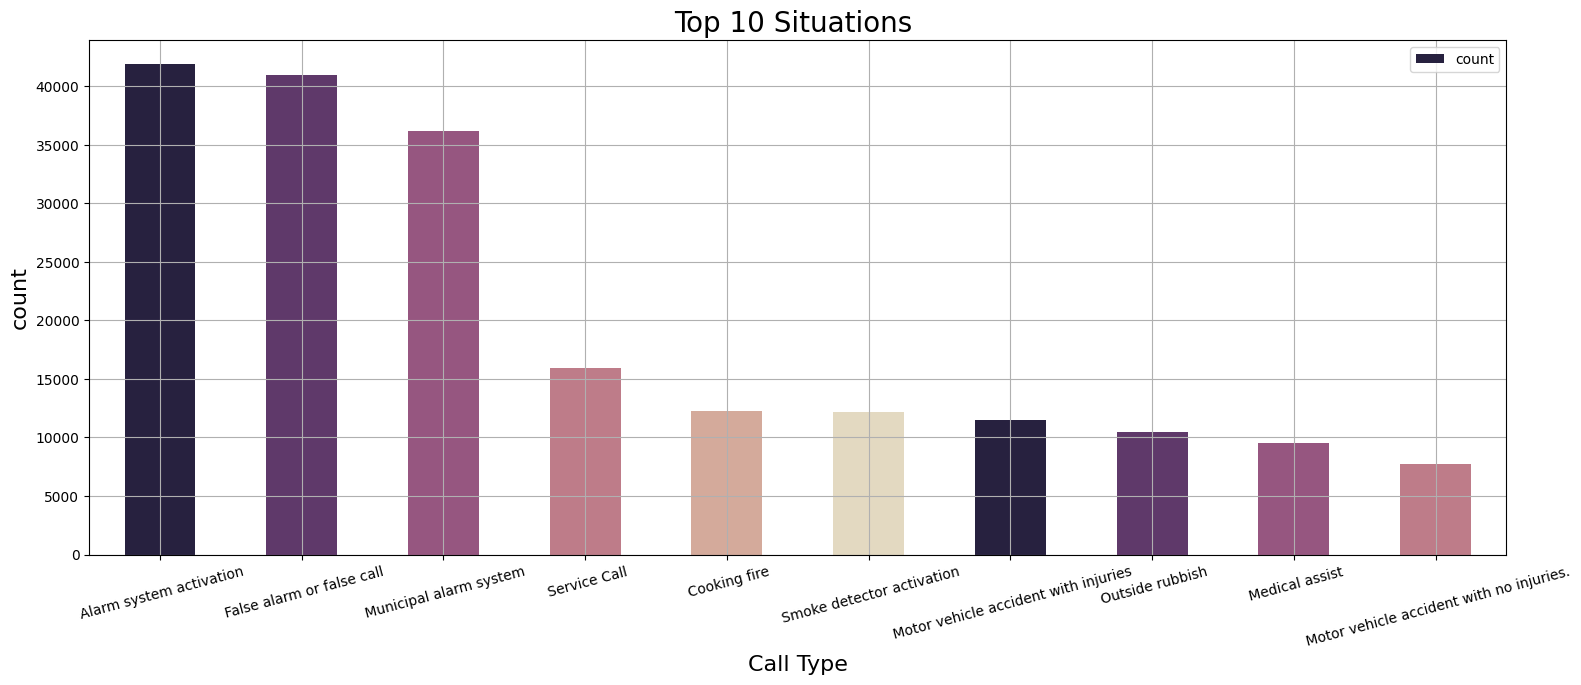

In [19]:
##
#
# Author: 
# Salim Omar
#
##

fig, ax = plt.subplots(figsize=(16, 7))

# define a color map
cmap = sns.color_palette("ch:s=-.2,r=.6")[::-1]

# plot the top 10 situations with the colormap
top10.plot(kind='bar', color=cmap, ax=ax)

# set the chart title and axis labels
plt.title('Top 10 Situations ', fontsize=20)
plt.xlabel('Call Type', fontsize=16)
plt.ylabel('count', fontsize=16)

# add grid lines
ax.grid(True)

# adjust x-tick labels rotation and font size
plt.xticks(rotation=15, fontsize=10)
new_xticklabels = [label.get_text()[3:] for label in ax.get_xticklabels()]
ax.set_xticklabels(new_xticklabels)

# add legend
ax.legend(loc='upper right')


# adjust spacing
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)

# convert to HTML and save
html = mpld3.fig_to_html(fig)
with open('Top_10_plot.html', 'w') as f:
    f.write(html)

# display the chart
plt.show()


* Here we also choosed to take a look for Top 10 Primary Situation over the years from 2010 to 2022


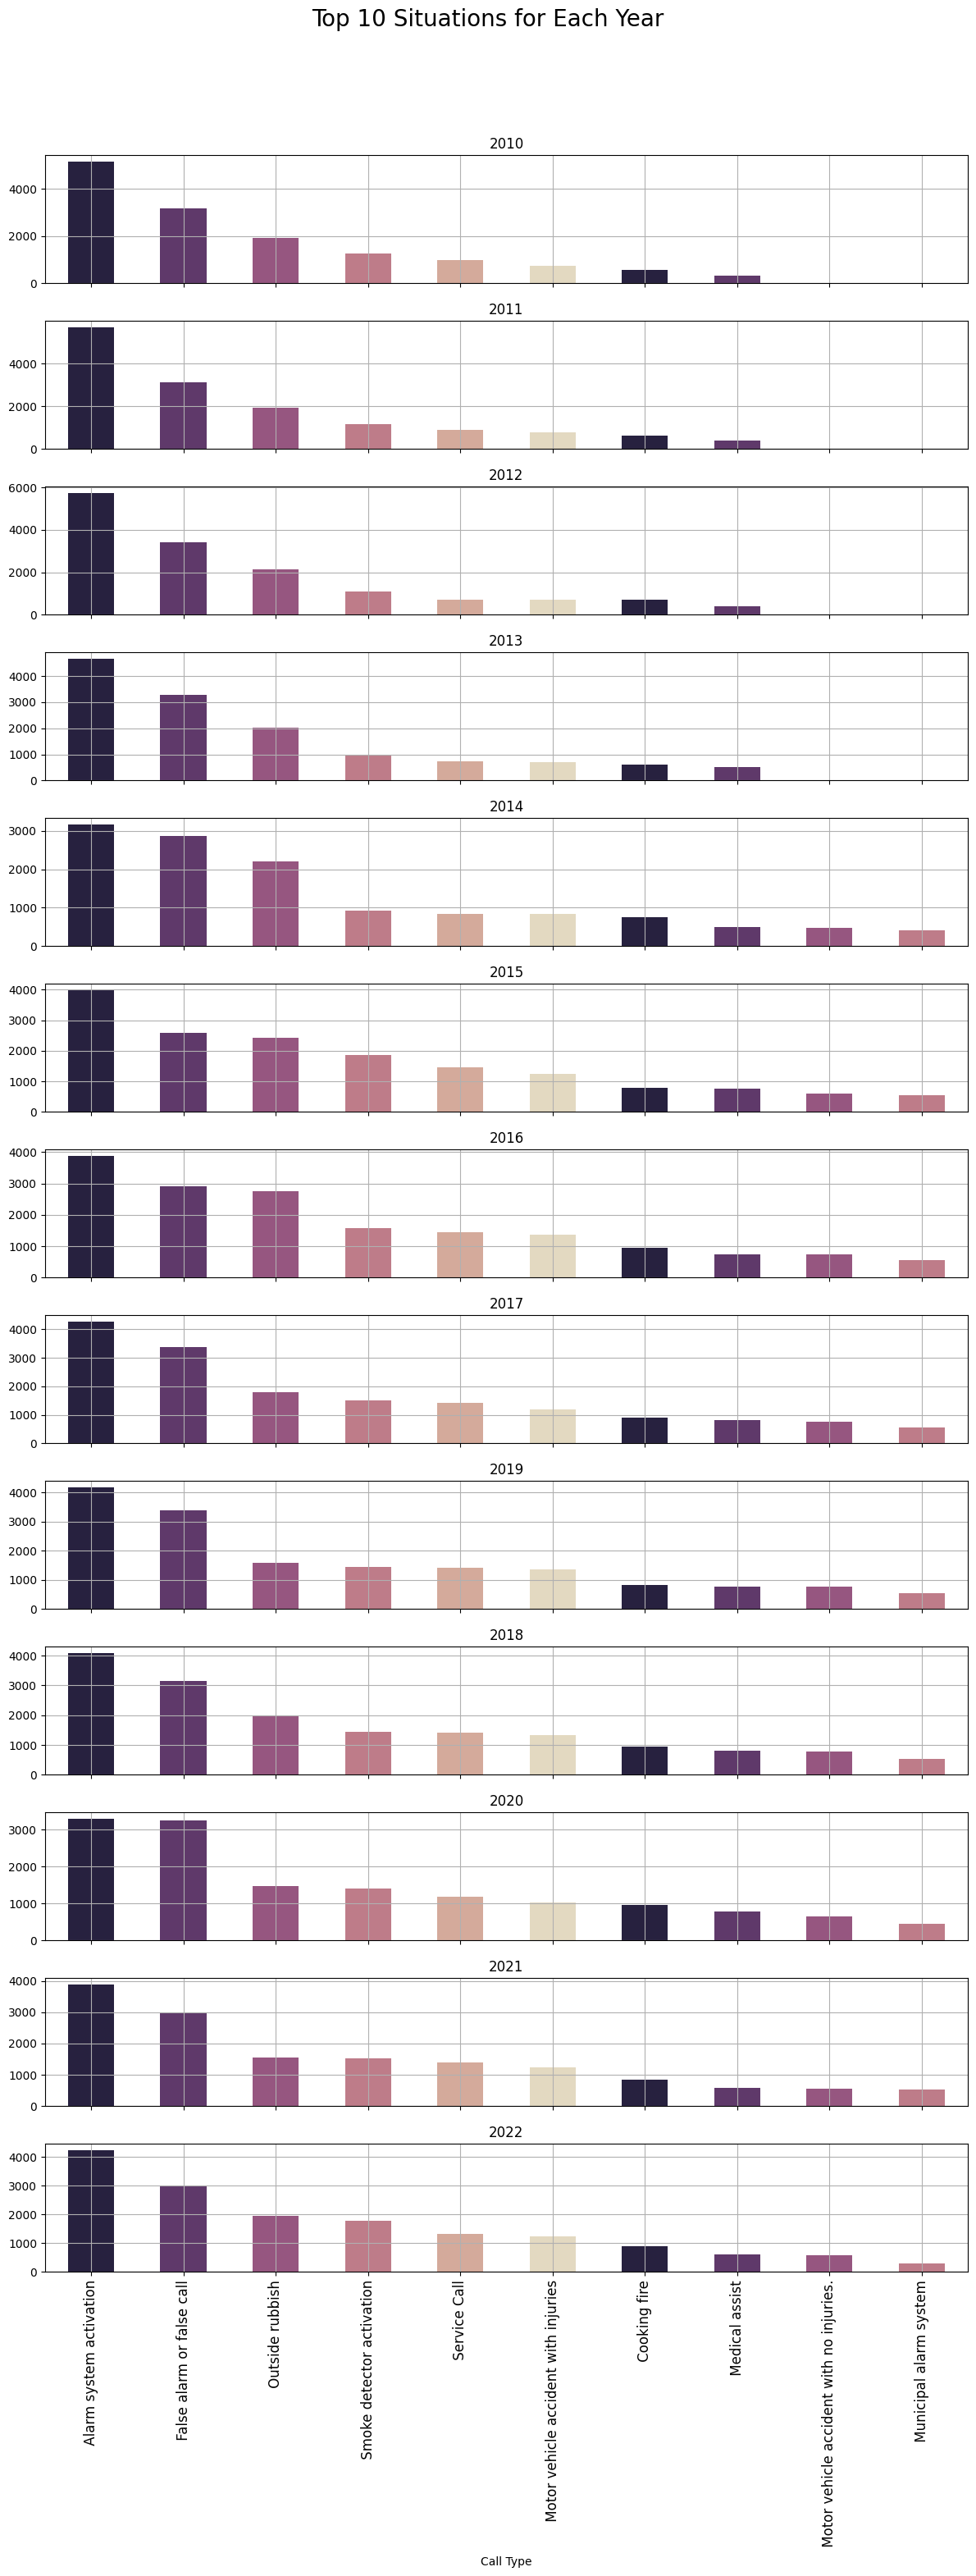

In [20]:
##
#
# Author: 
# Salim Omar
#
##
# Create a list of unique years in your data
years = top10_df['Incident year'].unique()

# Define the number of rows and columns for the subplots
nrows = 13
ncols = 1

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 33), sharex=True)

# Flatten the axes array
axes = axes.flatten()

# Loop through the years and plot the top 10 situations for each year
for i, year in enumerate(years):
    # Filter the data for the current year
    year_data = top10_df[top10_df['Incident year'] == year]
    
    # Get the top 10 situations for the current year
    call_Situation = year_data['Primary Situation']
    Situation_count = call_Situation.value_counts()
    top10 = Situation_count.nlargest(10)
    
    # Plot the top 10 situations in the current subplot
    cmap = sns.color_palette("ch:s=-.2,r=.6")[::-1]
    top10.plot(kind='bar', color=cmap, ax=axes[i])
    axes[i].set_title(str(year))
    axes[i].set_xlabel('Call Type')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=90, labelsize=12)
    axes[i].set_xticklabels([label.get_text()[3:] for label in axes[i].get_xticklabels()])
    axes[i].legend().set_visible(False)

# Add a title for the entire plot
fig.suptitle('Top 10 Situations for Each Year', fontsize=20)

# Adjust spacing
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot to a file
#plt.savefig('top10_subplots.png')

# Display the plot
plt.show()


* Here we well take a look in pie/donut chart for most heat sources fire-causing in San Francisco.

Heat Source
Heat from powered equipment, other                        2733
Heat; direct flame or convection                          1426
Radiated/conducted heat operating equ                     1371
Heat source: other                                        1143
Heat from other open flame or smoking materials, other     855
Hot or smoldering object, other                            799
Cigarette                                                  683
Electrical arcing                                          565
Name: count, dtype: int64


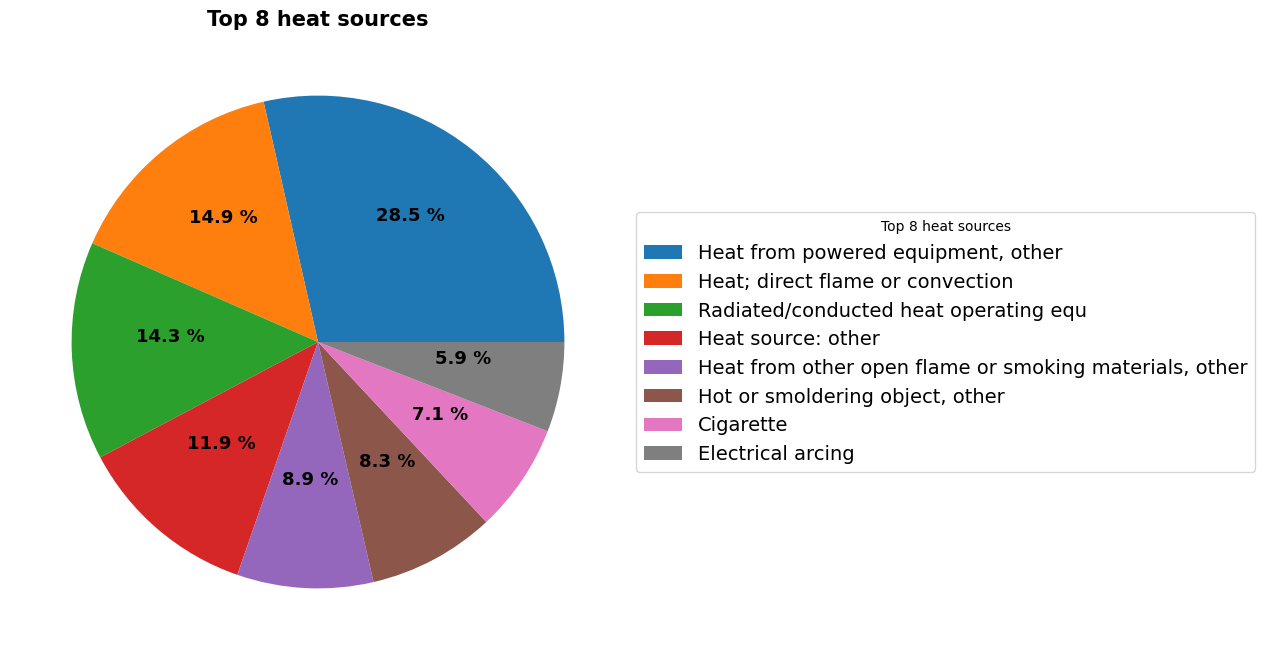

In [64]:
##
#
# Author: 
# Salim Omar
#
##

# Drop rows with missing data and unwanted values
df.dropna(subset=['Heat Source'], inplace=True)
df = df[~df['Heat Source'].isin(['UU Undetermined', 'UU - Undetermined', '-'])]

# Get the top 8 Heat Sources
top_heat_sources1 =df['Heat Source'].str[3:]
top_heat_sources1 = top_heat_sources1.str.replace('- ', '')
top_heat_sources = top_heat_sources1.value_counts().nlargest(8)
print(top_heat_sources)

# Create a figure and axis with equal aspect ratio
fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(aspect="equal"))



# Define a function to format the autopct labels with percentage and absolute count
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f} %\n "

# Create the pie chart
wedges, texts, autotexts = ax.pie(top_heat_sources.values, autopct=lambda pct: func(pct, top_heat_sources.values),
                                textprops=dict(color="w"))
# Add legend with the top 8 heat sources and adjust font size
ax.legend(wedges, top_heat_sources.index,
        title="Top 8 heat sources",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        prop={'size': 14}
        )


# Adjust font size and color for the autopct labels
plt.setp(autotexts, size=13, weight="bold", color="black")
# Add title to the plot
ax.set_title("Top 8 heat sources",weight="bold",size=15)

# convert to HTML and save
html = mpld3.fig_to_html(fig)
with open('heat_sources_plot.html', 'w') as f:
    f.write(html)
    

plt.show()

__________________________________________________________


# 3. Data Analysis


- ### <font color=green > Describe your data analysis and explain what you've learned about the dataset.</FONT>
So far from the dataset, we have gained insight into:

- Created a calplot to show, the amount of alarms on a given day within our dataframe period " Incident Date " from 2010 - 2022.
- The total amount of alarms each battalion had responded to within the dataframe period.
- What is the average response time for each of the battalions in total within the dataframe period.
- The 10 alarms with the highest count in the total dataframe period.
- The 10 alarms with the highest count for each individual year, within the dataframe period.




<font color=blue >Let's continue with further analyzes of our dataset.</FONT>



* Bokeh plot for top 10 Primary Situation and neighborhood_district in 2022

First, this code loads some data into a DataFrame and selects the top 10 situations based on their frequency count. Then, it filters the data to only include the rows where the incident year is 2022 and the primary situation is one of the top 10 situations.

Next, it groups the data by primary situation and neighborhood district and calculates the count for each group. It also calculates the total count for each primary situation.

Finally, it uses Bokeh to create a bar chart for each primary situation, with the neighborhoods on the x-axis and the count on the y-axis. then adds each bar to the chart and stores the resulting chart elements in a dictionary.


In [85]:
##
#
# Author: 
# Salim Omar
#
##

top10_df = df[['Primary Situation', 'focuse_Situation_by_number','neighborhood_district','Incident year']].copy()

# replace 2 coulms in 1 
top10_df['Primary Situation'].replace(['745 Alarm system sounded/no fire-accidental',
                                '735 Alarm system sounded due to malfunction'], '745 Alarm system activation', inplace=True)
top10_df = top10_df[top10_df['Primary Situation'] != '554 Assist invalid']

# add Situation_by_code
top10_df['focuse_Situation_by_number'] = top10_df['Primary Situation'].str[:3]

# get a list of the top 10
top10_situations = top10.index.tolist()
print(top10_situations)
#print(df['Primary Situation'])
top10_df = top10_df[top10_df['Incident year'] == 2022]
top10_df  = top10_df[top10_df['Primary Situation'].isin(top10_situations)]
#print(df['Primary Situation'])
neighborhood_Primary_Situation = top10_df.groupby(['Primary Situation','neighborhood_district']).size().reset_index(name='count')
#print(Battalion_Primary_Situation)

neighborhood_Primary_Situation.to_csv("neighborhood_Primary_Situation.csv")
# calculate the total count for each neighborhood
neighborhood_Primary_counts = top10_df.groupby(['Primary Situation']).size().reset_index(name='total_count')
#print(neighborhood_Primary_counts)

# merge the two dataframes to get the total count for each row
neighborhood_Primary_Situation = pd.merge(neighborhood_Primary_Situation, neighborhood_Primary_counts, on='Primary Situation')
#print(neighborhood_Primary_Situation)


#calculate the count pr ituation pr neighborhood
neighborhood_Primary_Situation['count_pr_Situation_pr_neighborhood'] = neighborhood_Primary_Situation['count'] 


columns = ['Primary Situation', 'neighborhood_district', 'count_pr_Situation_pr_neighborhood']
focusData =  pd.DataFrame(neighborhood_Primary_Situation, columns=columns)
#print(focusData)

# Pivot the dataframe
pivoted_focusData = focusData.pivot_table(index='neighborhood_district', columns='Primary Situation', values='count_pr_Situation_pr_neighborhood')

# Display the pivoted dataframe
#print(pivoted_focusData)


source = ColumnDataSource(data=pivoted_focusData)
## it is a standard way to convert your df to bokeh
output_notebook()


# Define a figure with title and axis labels
p = figure(x_range=source.data['neighborhood_district'], title="counts for call Situation pr neighborhood",x_axis_label='neighborhood',width =1800)
colo = Category10[10]
p.xaxis.major_label_orientation = 1.2
#3. Now we are going to add the bars. In order to do so, we will use vbar (see the guide for help):
bar ={} # to store vbars
items=[]


### here we will do a for loop:
for indx,Situation  in enumerate(pivoted_focusData.columns):
    bar[Situation] =p.vbar(x='neighborhood_district', 
    top=Situation ,
    source=source,
    muted=True, 
    muted_alpha=0.05,
    fill_alpha=1.9,
    color=colo[indx],
    width=0.7)
    items.append((Situation, [bar[Situation]]))

['745 Alarm system activation', '700 False alarm or false call', '711 Municipal alarm system', '500 Service Call', '113 Cooking fire', '743 Smoke detector activation', '322 Motor vehicle accident with injuries', '151 Outside rubbish', '311 Medical assist', '324 Motor vehicle accident with no injuries.']


Loading BokehJS ...

In [86]:
##
#
# Author: 
# Salim Omar
#
##
legend = Legend(items=items)
p.add_layout(legend, 'left')
p.legend.click_policy = "mute"
#output_file('bokeh_Situation_pr_neighborhood.html')
show(p)


* Below we have a bar chart plot which shows the average arrival time in the different neighbourhoods. From this plot, we can see that the highest average arrival time is in the neighborhoods: Golden Gate Park, Visitacion Valley and Lincoln Park.

In [88]:

# Author-
# Ali Dadayev 
# Filter for the year 2022


df['Arrive time_minutes'] = (df['Arrival DtTm'] - df['Alarm DtTm'])

average_arrival_time = df['Arrive time_minutes'].mean()

df['Arrive time_minutes'] = ((df['Arrival DtTm'] - df['Alarm DtTm']).dt.total_seconds() / 60.0).round(2)


avg_arrival_time_by_neighborhood = df.groupby('neighborhood_district')['Arrive time_minutes'].mean().round(2)


# we taje the date that match the map from Salim Part 
df = df[(df['Incident Date'] >= '2022-12-01') &
            (df['Incident Date'] <= '2022-12-31')]

# we just incloud the primry situation that are showing on the map 
df = df[df['focuse_Situation_by_number'].isin(['111', '700', '113','150'])]

# Convert to minutes and add a new column
df['Arrive time_minutes'] = ((df['Arrival DtTm'] - df['Alarm DtTm']).dt.total_seconds() / 60.0).round(2)


avg_arrival_time_by_battalion = df.groupby('neighborhood_district')['Arrive time_minutes'].mean().round(2).reset_index()
avg_arrival_time_by_battalion = avg_arrival_time_by_battalion.sort_values('Arrive time_minutes')
mean_arrival_time = avg_arrival_time_by_battalion['Arrive time_minutes'].mean()
# Create a bar chart with color gradient
data = [go.Bar(
            x=avg_arrival_time_by_battalion['neighborhood_district'],
            y=avg_arrival_time_by_battalion['Arrive time_minutes'],
            marker=dict(color=avg_arrival_time_by_battalion['Arrive time_minutes'],
                        colorscale='Reds',
                        cmin=1,   # set the minimum color value
                        cmax=9,   # set the maximum color value
                        reversescale=False
                        ),
            text=avg_arrival_time_by_battalion['Arrive time_minutes'],
            textposition='auto'
        )]



# Set layout options
layout = go.Layout(
    title='Average Arrival Time by neighborhood (01/2022 --> 12/2022)',
    xaxis=dict(title='neighborhood'),
    yaxis=dict(title='Average Arrival Time (Minutes)', range=[1, 7]),
    hovermode='closest',
    width=1300,
    height=800,
    
    shapes=[dict(type='line', x0=-0.5, y0=mean_arrival_time, x1=len(avg_arrival_time_by_battalion)-0.5, y1=mean_arrival_time,
                line=dict(color='red', width=2, dash='dash'))]
)

# Create the figure and save to an HTML file
fig = go.Figure(data=data, layout=layout )
#pyo.plot(fig, filename='plot_for_neighborhood.html')



# Display the plot in the notebook
pyo.iplot(fig)

 *  Polar bar plot showing the hourly count of alarms in the year 2022. We can clearly see that there are higher count of call between 09:00 and 21:00 and that means there is less alarms when people are sleeping 

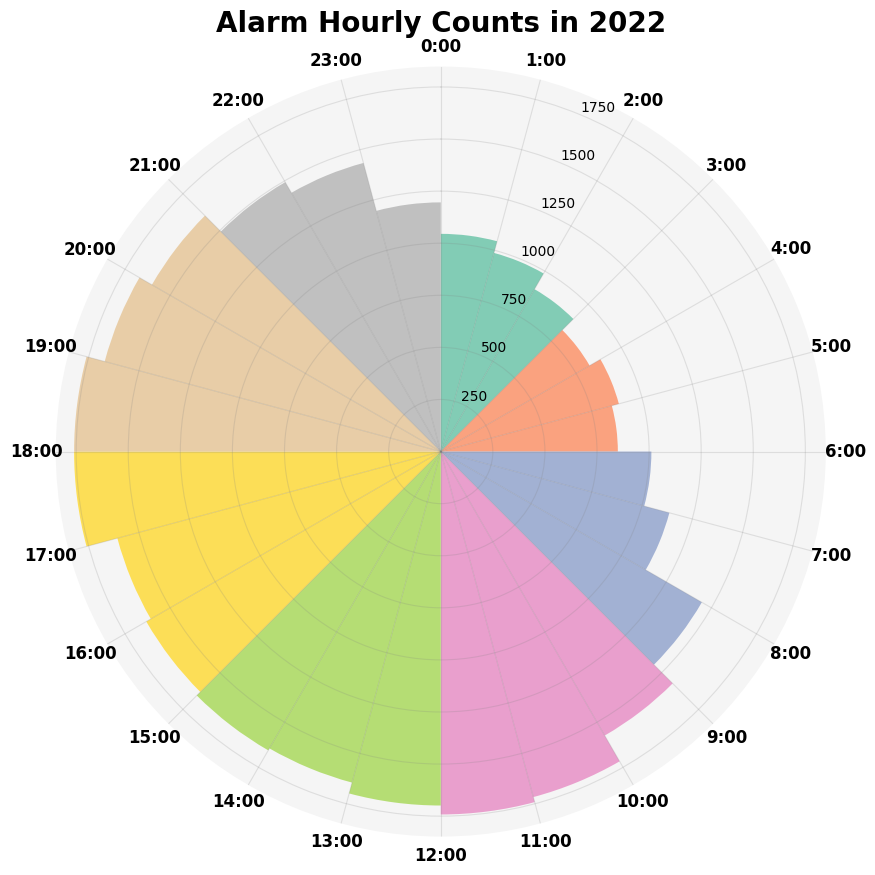

In [91]:

# Author-
# Ali Dadayev 


# Convert the alarm datetime column to datetime
df['Alarm DtTm'] = pd.to_datetime(df['Alarm DtTm'])

# Filter for the year 2022
df2 = df[df['Alarm DtTm'].dt.year == 2022]

# Group by hour and count number of alarms
hour_counts = df2.groupby(df2['Alarm DtTm'].dt.hour).size().reset_index(name='counts')

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))

colors = plt.cm.Set2(np.linspace(0, 1, len(hour_counts)))

bars = ax.bar(hour_counts['Alarm DtTm'] * 2 * np.pi / 24, hour_counts['counts'], 
            width=2*np.pi/24, align='edge', color=colors, alpha=0.8)

hours = np.arange(0, 24)
tick_labels = ['{}:00'.format(h) for h in range(24)]
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(tick_labels, fontsize=12, color='black', fontweight='bold')
ax.set_title('Alarm Hourly Counts in 2022', fontsize=20, pad=25, fontweight='bold')


# Set the starting angle and direction
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Customize the grid and background
ax.grid(color='gray', alpha=0.2)
ax.set_facecolor('whitesmoke')

# Remove unnecessary borders
ax.spines['polar'].set_visible(False)
ax.spines['start'].set_visible(False)
ax.spines['end'].set_visible(False)
ax.spines['inner'].set_visible(False)


plt.show()

____________________________________

# 4.Genre

- ### <font color=green >Which genre of data story did you use?</font>
   * We used  "Magazine Style" genre and "Annotated Graph / Map " for our data story, as we focused on exploring a specific dataset with help of variety of plots with some effects and animations to gain insights into the characteristics of fire incidents in San Francisco.


- ### <font color=green >Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?</font>
    Visual Structuring:

     - Consistent Visual Platform (everything hapens on same page mainly)

     - Progress Bar Our Website has a scrollbar 


    Highlighting:

     - Zooming and panning: We used zooming and panning to allow the user to focus on specific areas of the visualizations and explore them in more detail.
        
        
    Transition Guidance:

     - Familiar Objects (Several similar graph types)

- ### <font color=green >Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?</font>

    Ordering:

     - Linear 

    Interactivity:

     - Hover Highlighting / Details 

    Messaging:

     - Introductory Text 

     - Multi-Messaging 

     - Captions / Headlines 

     - Summary 

     - Accompanying Article 
     
         

    We used these tools to help users understand the data better and to tell a compelling story about fire incidents in San Francisco. The data-driven sequences and interactive components help users to explore the data and draw their own conclusions, while the context and annotations provide additional information and insights.

________________________________________

# 5.Visualizations

* This code reads in data about fire stations in San Francisco, filters it to only include those managed by the "Fire Department", creates a map centered on San Francisco, adds markers to indicate the location of each fire station meeting the filter criteria, and finally saves the map to an HTML file.

In [92]:
    # Author Thomas Arildtoft - S193564

# Load the data
fire_stations = pd.read_csv('../geo_map_data/City-owned_Facilities_-_Fire_and_Police.csv')

# Filter the data to only include fire stations with "Fire Department" in the jurisdiction
san_francisco_fire_stations = fire_stations[fire_stations['jurisdiction'] == 'Fire Department']

# Create a folium map centered on San Francisco
m = folium.Map(location=[37.773972, -122.431297], zoom_start=13)

# Add markers for each fire station
for index, row in san_francisco_fire_stations.iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['common_name']).add_to(m)

# Save the map to an HTML file
#m.save('Fire_stations_map.html')
m

* A map to show the distribution for 4 Primary Situations 3 of them are really fire cases and one is false alarm in different Neighborhood

In [93]:
##
#
# Author: 
# Salim Omar
#
##

# dataset for map
df_2022 = df[(df['Incident Date'] >= '2022-12-01') &
            (df['Incident Date'] <= '2022-12-31')]
df_2022.head()
# len(df_2022)
focuse_Situation2 = df_2022['Primary Situation']
ListOfSituation2 = focuse_Situation2.unique()
#print(ListOfSituation2)
len(ListOfSituation2)

focuse_Situation = df_2022['focuse_Situation_by_number']
ListOfSituation = focuse_Situation.unique()
#print(ListOfSituation)
from shapely import wkt
# df_2022.loc[df_2022['focuse_Situation_by_number'].str.startswith('1'), 'focuse_Situation_by_number'] = 'Fire/explosion'
# df_2022.loc[df_2022['focuse_Situation_by_number'].str.startswith('5'), 'focuse_Situation_by_number'] = 'Public service'
# df_2022.loc[df_2022['focuse_Situation_by_number'].str.startswith('7'), 'focuse_Situation_by_number'] = 'Alarm'
# df_2022['focuse_Situation_by_number'].replace(['322','324'], 'Motor vehicle accident', inplace=True)
# df_2022['focuse_Situation_by_number'].replace(['311'], 'Medical assist', inplace=True)
# df_2022['focuse_Situation_by_number'].replace(['700'], 'False alarm/call', inplace=True)
# df_2022['focuse_Situation_by_number'].replace(['322'], 'Motor vehicle accident with injuries', inplace=True)
# df_2022['focuse_Situation_by_number'].replace(['311'], 'Medical assist', inplace=True)
df_2022 = df_2022[df_2022['focuse_Situation_by_number'].isin(['111', '700', '113','150'])]
df_2022['focuse_Situation_by_number'].replace(['150'], 'Outside rubbish fire', inplace=True)
df_2022['focuse_Situation_by_number'].replace(['111'], 'Building fire', inplace=True)
df_2022['focuse_Situation_by_number'].replace(['700'], 'False alarm/call', inplace=True)
df_2022['focuse_Situation_by_number'].replace(['113'], 'Cooking fire', inplace=True)

# keep the important coulmn and drop other 
df_2022 = df_2022.loc[:, ['ID', 'point', 'Incident year', 'focuse_Situation_by_number']]


df_2022['point'] = df_2022['point'].apply(wkt.loads)
df_2022['lon'] = df_2022['point'].apply(lambda p: p.x)
df_2022['lat'] = df_2022['point'].apply(lambda p: p.y)

focuse_Situation = df_2022['focuse_Situation_by_number']
ListOfSituation = focuse_Situation.unique()
print(ListOfSituation)

df_2022.head()
len(df_2022)


['Cooking fire' 'Outside rubbish fire' 'False alarm/call' 'Building fire']


560

In [94]:
##
#
# Author: 
# Salim Omar
#
##

with open('../geo_map_data/Planning Neighborhood Groups Map.geojson', 'r') as f:
    data = json.load(f)

data["features"][0]


# Create a dictionary to map focuse_Situation_by_number values to colors
situation_color_dict = {
    # 'Fire/explosion': 'green',
    'Outside rubbish fire': 'orange',
    'False alarm/call': 'purple',
    'Cooking fire': 'blue',
    'Building fire': 'red'
}

color_icon_dict = {
    'red': 'fa-fire',
    # 'green': 'fa-aulance',
    'blue': 'fa-building',
    'orange': 'fa-free-code-camp',
    'purple': 'fa-bell'
}


def random_color(fea):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }


my_map = Map(center=(37.7749, -122.4194), zoom=12,
    layout={'height': '600px', 'width': '100%'})


# Add GeoJSON layer to the map
geojson_layer = GeoJSON(
    data=data,
    style={
        'color': 'gray',
        'weight': 3,
        'fillOpacity': 0.2

    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.4,
    },
    style_callback=random_color,
    name='Neighborhoods',
)


my_map.add_layer(geojson_layer)

# Add markers to the map for each incident in the data
for index, row in df_2022.iterrows():
    location = (row['lat'], row['lon'])
    marker_color = situation_color_dict[row['focuse_Situation_by_number']]
    marker = Marker(location=location, draggable=False,
                    title=row['focuse_Situation_by_number'])
    marker.icon = AwesomeIcon(
        name=color_icon_dict[marker_color], marker_color=marker_color, icon_color='black')
    my_map.add_layer(marker)


my_map.add_control(FullScreenControl())

# Display the map
my_map


Map(center=[37.7749, -122.4194], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

A map with the 4 Primary Situations and Fire stations

In [95]:
##
#
# Author: 
# Salim Omar
#
##

import folium
from folium.plugins import Fullscreen

# create a Folium map object from the ipyleaflet map
m = folium.Map(location=my_map.center,
            zoom_start=my_map.zoom, control_scale=True)

color_icon_dict2 = {
    'red': 'fire',
    'blue': 'cloud',
    'orange': 'trash',
    'purple': 'bell'
}

# Add GeoJSON layer to the map
geojson_layer = folium.GeoJson(
    data=data,
    style_function=lambda features: {
        'color': 'gray',
        'weight': 3,
        'fillOpacity': 0.2
    },
    highlight_function=lambda x: {'fillColor': random.choice(
        ['red', 'yellow', 'green', 'orange', 'blue'])},
    name='Neighborhoods',

)
geojson_layer.add_to(m)




fire_stations = pd.read_csv('../geo_map_data/City-owned_Facilities_-_Fire_and_Police.csv')
san_francisco_fire_stations = fire_stations[fire_stations['jurisdiction'] == 'Fire Department']
# Add markers for each fire station
for index, row in san_francisco_fire_stations.iterrows():
        folium.Marker(
            location=[row['latitude'],
                    row['longitude']],
                    popup=row['common_name'],
                    icon=folium.Icon(color='green')
            ).add_to(m)


# Add markers to the map for each incident in the data
for index, row in df_2022.iterrows():
    location = (row['lat'], row['lon'])
    marker_color = situation_color_dict[row['focuse_Situation_by_number']]
    icon = folium.Icon(icon=color_icon_dict2[marker_color], color=marker_color,icon_color='black')
    marker = folium.Marker(location=location, draggable=False,
                        title=row['focuse_Situation_by_number'], icon=icon)
    marker.add_to(m)

# add Fullscreen control to the map
Fullscreen().add_to(m)

# save the map as an HTML file

#m.save('Situation_map.html')
m

_______________________________________

- ### <font color=green >Explain the visualizations you've chosen.</font>

    - Bar plots - are a useful tool for visualizing and comparing differences between categories or groups of data. They are easy to interpret and can display a wide range of information, making them a versatile tool for data analysis and visualization.

    - Line charts - are useful because they show changes in data over time, allow for easy comparison of multiple data sets, and are simple and easy to interpret.

    - Bokeh charts - are useful for visualizing and exploring data in an interactive and dynamic way. With Bokeh, users can create a wide range of charts, including line, scatter, and bar charts, with customizable features such as axes, grids, and legends. Bokeh charts allow for exploration of large datasets with tools like zooming, panning, and hovering over data points to see more details. The interactive nature of Bokeh charts makes them particularly useful for data analysis and communication, as they allow users to uncover hidden patterns and trends in the data. Overall, Bokeh charts provide a powerful tool for data visualization and analysis that enables users to gain deeper insights into their data.

    - Maps - are useful for data visualization because they allow for the representation of data in a spatial context. By plotting data on a map, viewers can see patterns and trends that may not be immediately apparent in a tabular or textual format. Maps can provide insights into geographic variations and distributions, allowing for easy identification of areas of high or low values. They are also useful for displaying data that is related to geographic locations, such as demographic information or environmental data. Overall, maps are a powerful tool for visualizing data and providing insights into spatial patterns and relationships.

    - Donut charts - are a visually appealing and useful tool for comparing the proportions of different categories or groups within a dataset. They can display multiple categories in a single chart and can be customized to show additional information, making them a valuable tool for data visualization.

    - Polar charts - are useful for displaying multiple variables at once and highlighting changes in data over time. They provide a visual representation of relationships between variables, making it easy to identify patterns and trends in the data.

    - Pie charts - are useful for displaying proportions and percentages within a dataset in a clear and easy-to-understand way. They are particularly useful for showing data that can be divided into categories or groups.

________________________________________

# 6. Discussion


- ### <font color=green >What went well?</font>
    * When looking at our plots, we succeeded showing our original idea behind them in a way we think would be informative for others to read, and hopefully understandable for people with little to no knowledge about the topic data visualization. We wanted to stick to what we have learned from our classes, but also try something new and different. Which we think we succeded with at least on our maps.

- ### <font color=green >What is still missing? What could be improved?, Why?</font>
    * We would have liked to provide more data on the differentiation of the neighborhoods, here we mean if neighborhoods with lower income had higher response times from the firestations, or the differentiation between neighborhoods with high and low crime rates, regarding alarm types that the fire departments would receive.


_________________________________________________________________________________________________________________________________

# 7. Contributions

 - ### <font color=green >Who did what?</font>
    * We started out assigning certain plots for each group member, this has been documented inside the jupyter document with the author tags, otherwise we have labeled certain portiona of the plots and diagrams under " Part " this should otherwise make it obivous to identify each team members contribution.

    * We then startede on the explainer notebook, this was an team effort since every single member was online on Discord, contributing to the assignment, so to specify who wrote what column inside this Notebook would be difficult.

    * The website, has contribution from us all towards HTML layout, CSS to the text written on the website.

      * <br> Salim  :<br> Generating, finalizing site and deployment (40%) | Preprocessing & cleaning (45%) | documantaion (25%) | video (20%)
      *  <br>Thomas :<br> Generating, finalizing site and deployment (30%) | Preprocessing & cleaning (35%) | documantaion (35%) | video (40%)
      * <br>Ali    :<br> Generating, finalizing site and deployment (30%) | Preprocessing & cleaning (20%) | documantaion (40%) | video (40%)

 ¤ Relevant links has been inserted in the text itself.

________________________________